In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import joblib

In [5]:
df=pd.read_csv("Churn_Modelling.csv")

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(columns=["RowNumber","Surname","CustomerId"], axis=1,inplace=True)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df.groupby(['Geography', 'Gender'])['Balance'].mean()

Geography  Gender
France     Female     60322.670159
           Male       63546.284875
Germany    Female    119145.966471
           Male      120259.668222
Spain      Female     59862.092534
           Male       63352.833746
Name: Balance, dtype: float64

In [12]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True, dtype=int)

In [13]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,0


In [14]:
df["Gender"]=df["Gender"].map({"Male":0, "Female":1})

In [15]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,1,0


In [16]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

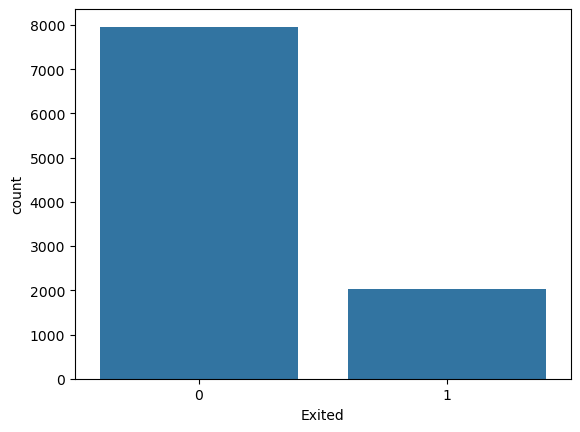

In [17]:
sns.countplot(data=df, x="Exited")

In [18]:
X=df.drop(["Exited"], axis=1)

In [27]:
y=df["Exited"]

In [33]:
X,y

(      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0             619       1   42       2       0.00              1          1   
 1             608       1   41       1   83807.86              1          0   
 2             502       1   42       8  159660.80              3          1   
 3             699       1   39       1       0.00              2          0   
 4             850       1   43       2  125510.82              1          1   
 ...           ...     ...  ...     ...        ...            ...        ...   
 9995          771       0   39       5       0.00              2          1   
 9996          516       0   35      10   57369.61              1          1   
 9997          709       1   36       7       0.00              1          0   
 9998          772       0   42       3   75075.31              2          1   
 9999          792       1   28       4  130142.79              1          1   
 
       IsActiveMember  EstimatedSalary

In [34]:
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,0.024628,-0.016889
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


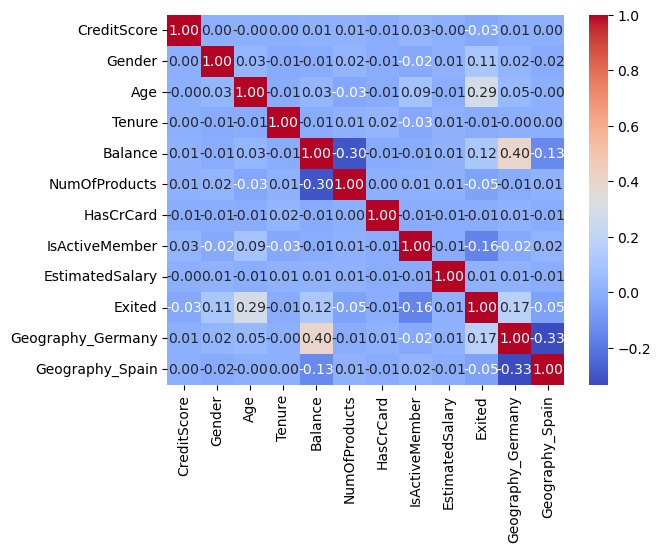

In [37]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

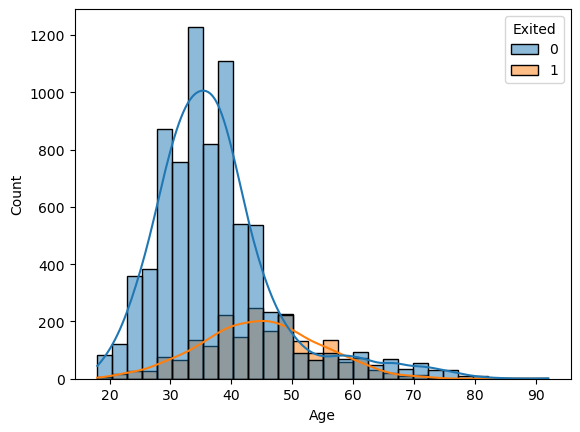

In [39]:
sns.histplot(data=df, x="Age", hue="Exited", kde="True", bins=30) 
plt.show()

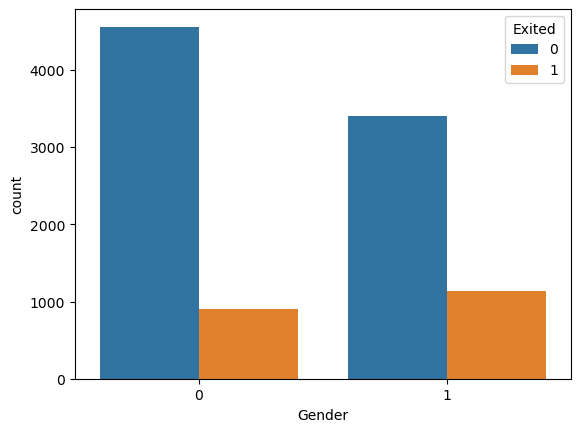

In [42]:
sns.countplot(data=df, x="Gender", hue="Exited")
plt.show()

<Axes: xlabel='CreditScore', ylabel='Balance'>

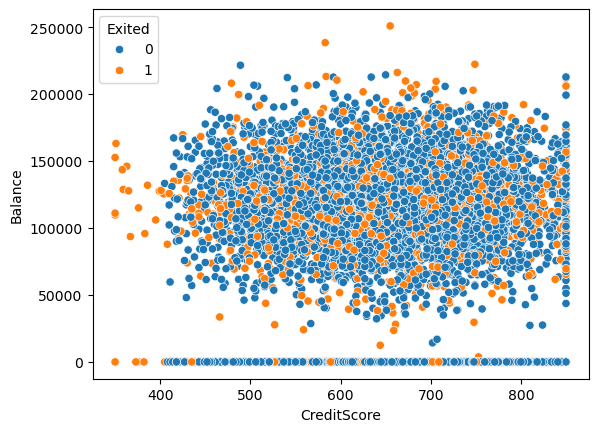

In [43]:
sns.scatterplot(data=df, x="CreditScore", y="Balance", hue="Exited")

In [44]:
X_train, X_test , y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='Age', ylabel='Balance'>

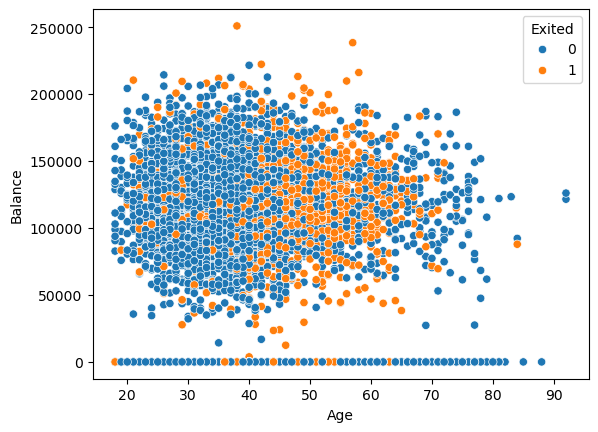

In [45]:
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited')


<Axes: xlabel='Exited', ylabel='CreditScore'>

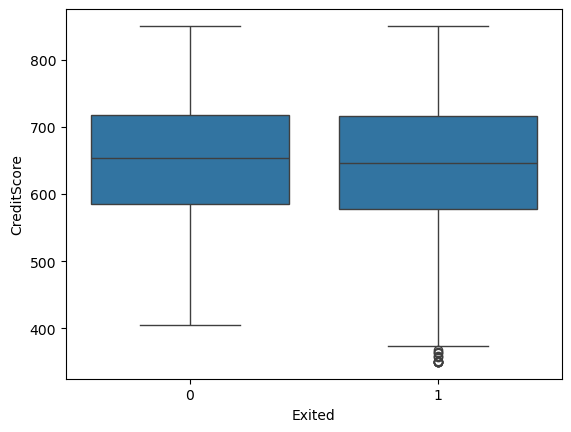

In [47]:
sns.boxplot(data=df, x="Exited", y="CreditScore")

In [48]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9254,686,0,32,6,0.00,2,1,1,179093.26,0,0
1561,632,0,42,4,119624.60,2,1,1,195978.86,1,0
1670,559,0,24,3,114739.92,1,1,0,85891.02,0,1
6087,561,1,27,9,135637.00,1,1,0,153080.40,0,0
6669,517,0,56,9,142147.32,1,0,0,39488.04,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05,0,0
5191,682,1,58,1,0.00,1,1,1,706.50,0,0
5390,735,1,38,1,0.00,3,0,0,92220.12,0,0
860,667,0,43,8,190227.46,1,1,0,97508.04,0,0


In [50]:
X_train.shape,X_test.shape,y_test.shape, y_train.shape

((8000, 11), (2000, 11), (2000,), (8000,))

In [85]:
sm=SMOTE(random_state=42)
X_train_bal, y_train_bal=sm.fit_resample(X_train, y_train)
y_train_bal.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

In [54]:
model=RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

In [55]:
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [58]:
y_pred=model.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred)

0.872

In [60]:
classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92      1607\n           1       0.80      0.47      0.59       393\n\n    accuracy                           0.87      2000\n   macro avg       0.84      0.72      0.76      2000\nweighted avg       0.87      0.87      0.86      2000\n'

In [61]:
y_prob=model.predict_proba(X_test)[:,1]

In [63]:
y_pred_custom=np.where(y_prob>=0.3,1,0)

In [65]:
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.58      0.67      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [71]:
joblib.dump(model, "churn_prediction.pkl")

['churn_prediction.pkl']